In [1]:
import numpy as np
from numpy import e, pi, log, exp, sqrt, sin, arcsin, sinh, cos, tan, arctan, tanh, arctanh
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def Midpoint_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    d = len(y_0)
    
    t = np.linspace(a, b, n+1)
    w = np.zeros((d, n+1))
    w[:, 0] = y_0
    
    for i in range(n):
        w[:, i+1] = w[:, i] + h*f(t[i] + h/2, w[:, i] + f(t[i], w[:, i])*h/2)
        
    return t, w

# 例1

In [4]:
a, b = 0, 1
h = 0.01
y_01 = (1,1)
y_02 = (1,0)
y_t =(1,-0.4203)

def f(t, y):
    y1,y2 = y
    
    f1_ = y2
    f2_ = 4*y1
    
    return np.array([f1_, f2_])

t1, w1 = Midpoint_method(f, a, b, h, y_01)
t2, w2 = Midpoint_method(f, a, b, h, y_02)
t3, w3 = Midpoint_method(f, a, b, h, y_t)

In [5]:
print(w1)

[[ 1.          1.0102      1.02080404  1.03181636  1.04324137  1.05508363
   1.06734788  1.08003904  1.09316216  1.1067225   1.1207255   1.13517673
   1.15008199  1.16544724  1.18127863  1.19758247  1.21436531  1.23163384
   1.24939498  1.26765582  1.28642368  1.30570606  1.32551066  1.34584542
   1.36671847  1.38813814  1.41011302  1.43265189  1.45576376  1.47945789
   1.50374373  1.52863102  1.55412969  1.58024996  1.60700226  1.63439731
   1.66244604  1.69115969  1.72054974  1.75062794  1.78140632  1.8128972
   1.84511316  1.8780671   1.91177219  1.94624191  1.98149005  2.01753071
   2.0543783   2.09204757  2.13055357  2.16991171  2.21013773  2.25124771
   2.29325811  2.33618572  2.38004771  2.42486163  2.4706454   2.51741733
   2.56519613  2.6140009   2.66385117  2.71476688  2.76676839  2.8198765
   2.87411245  2.92949793  2.98605509  3.04380656  3.10277543  3.16298529
   3.22446022  3.28722481  3.35130416  3.4167239   3.48351019  3.55168975
   3.62128985  3.69233832  3.76486359  3

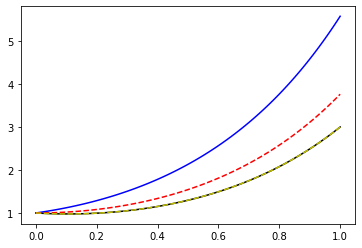

In [6]:
u1=w1[0][-1]
u2=w2[0][-1]
c2=(3-u1)/(u2-u1)
c1=(u2-3)/(u2-u1)
y_c=c1*w1[0]+c2*w2[0]
plt.plot(t3,w3[0],'k-',t1,w1[0],'b-',t2,w2[0],'r--',t1,y_c,'y--')

In [5]:
len(t2)

101

In [17]:
def RKF45(f, a, b, tol, y_0):
    h = b - a
    
    t_i = a
    w_i = np.array(y_0)
    t = [t_i]
    w = [w_i]
    doubled = False
        
    while t_i < b:
        s_1 = f(t_i, w_i)
        s_2 = f(t_i + h/4, w_i + h*s_1/4)
        s_3 = f(t_i + h*3/8, w_i + h*s_1*3/32 + h*s_2*9/32)
        s_4 = f(t_i + h*12/13, w_i + h*s_1*1932/2197 - h*s_2*7200/2197 + 
                h*s_3*7296/2197)
        s_5 = f(t_i + h, w_i + h*s_1*439/216 - h*s_2*8 + h*s_3*3680/513 -
               h*s_4*845/4104)
        s_6 = f(t_i + h/2, w_i - h*s_1*8/27 + h*s_2*2 - h*s_3*3544/2565 + 
               h*s_4*1859/4104 - h*s_5*11/40)

        w_ii = w_i + h*(s_1*25/216 + s_3*1408/2565 + s_4*2197/4104 - s_5/5)
        z_ii = w_i + h*(s_1*16/135 + s_3*6656/12825 + s_4*28561/56430 -
                        s_5*9/50 + s_6*2/55)
        e_ii = abs(w_ii - z_ii)
        
        rel_error = abs(np.max(e_ii / w_ii))
        if doubled:
            doubled = False
            pass
        elif rel_error > tol:
            h *= 0.8 * pow(tol / rel_error, 1/5)
            continue
        elif t_i + h > b:
            h = b - t_i
            continue

        t_i += h
        w_i = z_ii
        t.append(t_i)
        w.append(w_i)
        
        if (rel_error < tol/10) & (t_i + h < b):
            h *= 2
            doubled = True
    
    return t, np.array(w).T

In [18]:
def find_interval(f, a, b, tol, y_boundary,smin=-2, smax=2, count=1000, find_y2=False):
    y_a, y_b = y_boundary

    for num in range(count):
        s_interval = (smax-smin)*np.random.rand(2) + smin
        s_interval.sort()
        test = 1

        for s in s_interval:
            y_0 = (y_a, s)
            t, y = RKF45(f, a, b, tol, y_0)
            test *= (y[int(find_y2)][-1] - y_b)

        if test < 0:
            return s_interval.tolist()
    
    return False

In [13]:
aa=np.random.rand(2)
print(aa)

[0.75984867 0.13851269]


In [12]:
aa.sort()
print(aa)

[0.24831158 0.63674334]


In [33]:
print(aa[0])

0.46758469561421645


In [9]:
print(aa.tolist())

[0.46758469561421645, 0.632748586611597]


In [14]:
int(True)

1

In [15]:
int(False)

0

In [19]:
def Shooting(f, a, b, tol, y_boundary, s_interval, find_y2=False):
    s0, s1 = s_interval
    y_a, y_b = y_boundary
    F_s = [0] * 2

    for i in range(2):
        s = s_interval[i]
        y_0 = (y_a, s)
        t, y = RKF45(f, a, b, tol, y_0)
        F_s[i] = y[int(find_y2)][-1] - y_b
    
    while True:
        c = (s0 + s1) / 2
        if s1 - s0 < tol:
            break;

        y_0 = (y_a, c)
        t, y = RKF45(f, a, b, tol, y_0)
        temp = y[int(find_y2)][-1] - y_b

        if temp * F_s[0] > 0:
            s0 = c
            F_s[0] = temp
            continue
        elif temp * F_s[1] > 0:
            s1 = c
            F_s[1] = temp
            continue
        else:
            break
    y_0 = (y_a, c)
    tt,ww=RKF45(f, a, b, tol, y_0)
    
    return tt,ww,(s0+s1)/2

In [15]:
bb=[0]*2
print(bb)

[0, 0]


# 例2

In [20]:
tol = 5e-8

In [21]:
a, b = 1, 2
y_boundary = 0, 0

def f(t, y):
    y1, y2 = y
    equation = [(4-2*y2)/t**3, -exp(y1)]
    return np.array(equation)

In [31]:
s_interval = find_interval(f, a, b, tol, y_boundary,count=10,find_y2=True)
print("Initial Interval: [%.4f, %.4f]" % (s_interval[0], s_interval[1]))

Initial Interval: [-0.2011, 1.6226]


True init: 1.500007002272115


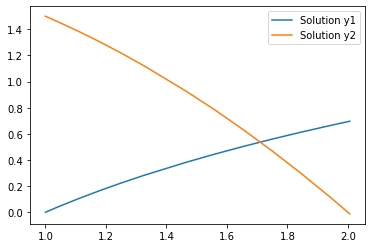

In [26]:
t, y,s= Shooting(f, a, b, tol, y_boundary, s_interval,find_y2=True)
print("True init:",s)

plt.plot(t, y[0], label="Solution y1")
plt.plot(t, y[1], label="Solution y2")
plt.legend()
plt.show()

# 例3

In [6]:
tol = 5e-8

In [33]:
a, b = 1, 2
y_boundary = 1,8

smin=-100
smax=100

def f(t, y):
    y1, y2 = y
    equation = [y2, 6*y1**(1/3)]
    return np.array(equation)

def exact_sol(t):
    return t**3

In [34]:
s_interval = find_interval(f, a, b, tol, y_boundary,smin,smax,count=1000,find_y2=False)
print("Initial Interval: [%.4f, %.4f]" % (s_interval[0], s_interval[1]))

Initial Interval: [2.5641, 43.7385]


/Users/jinmianli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


True init: 3.000000237706372


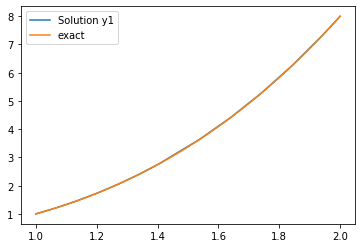

In [35]:
t, y,s= Shooting(f, a, b, tol, y_boundary, s_interval,find_y2=False)
print("True init:",s)

plt.plot(t, y[0], label="Solution y1")
x_range=np.linspace(1,2,100)
plt.plot(x_range, exact_sol(x_range),label="exact")
plt.legend()
plt.show()

In [26]:
int(True)

1

In [27]:
int(False)

0

In [28]:
np.random.rand(2)

array([0.48360015, 0.58427793])